<a href="https://colab.research.google.com/github/suryawahyus/MachineLearning/blob/main/TaskWeek5/EDA_House_pricing_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [4]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
file_path = '/content/drive/MyDrive/Machine Learning/dataset/House_Price_dataset.csv'

In [27]:
# Baca dataset ke dalam DataFrame
house_df = pd.read_csv(file_path)

# Tampilkan lima baris pertama dari DataFrame
house_df.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla


In [28]:
house_2 = house_df.dropna()

In [29]:
house_2.describe()

,property_id,location_id,price,latitude,longitude,baths,bedrooms,Area Size
count,1.243740e+05,124374.000000,1.243740e+05,124374.000000,124374.000000,124374.000000,124374.000000,124374.000000
mean,1.627201e+07,4353.955698,1.919263e+07,29.842276,71.246878,2.793285,3.146092,5.906584
std,1.628700e+06,3769.506096,3.750504e+07,3.792758,3.131293,2.568235,1.950180,5.931426
min,8.657500e+04,3.000000,0.000000e+00,24.749425,66.863657,0.000000,0.000000,0.000000
25%,1.601640e+07,1290.000000,2.000000e+05,24.951049,67.130733,0.000000,2.000000,3.000000
50%,1.691088e+07,3282.000000,9.205000e+06,31.457698,73.056182,3.000000,3.000000,5.000000
75%,1.714516e+07,7220.000000,2.100000e+07,33.558920,74.165909,4.000000,4.000000,8.400000
max,1.735772e+07,14220.000000,2.000000e+09,73.184088,74.564727,403.000000,68.000000,800.000000


In [30]:
house_2['purpose'].value_counts()

For Sale    89191
For Rent    35183
Name: purpose, dtype: int64

In [31]:
house_2['province_name'].value_counts()

Punjab               51777
Sindh                44697
Islamabad Capital    27900
Name: province_name, dtype: int64

In [32]:
house_2['property_type'].value_counts()

House            78487
Flat             28019
Upper Portion    10201
Lower Portion     6660
Farm House         502
Room               261
Penthouse          244
Name: property_type, dtype: int64

In [33]:
check_duplicate = house_2.duplicated()

In [34]:
True in check_duplicate

False

In [35]:
n_by_province = house_df.groupby(['province_name','property_type'],as_index=False)['property_id'].count()
n_by_province

,province_name,property_type,property_id
0,Islamabad Capital,Farm House,240
1,Islamabad Capital,Flat,7114
2,Islamabad Capital,House,19912
3,Islamabad Capital,Lower Portion,4250
4,Islamabad Capital,Penthouse,49
5,Islamabad Capital,Room,377
6,Islamabad Capital,Upper Portion,5484
7,Punjab,Farm House,343
8,Punjab,Flat,4123
9,Punjab,House,60297


[Text(0.5, 0, 'Total count'), Text(0, 0.5, 'Propery type')]

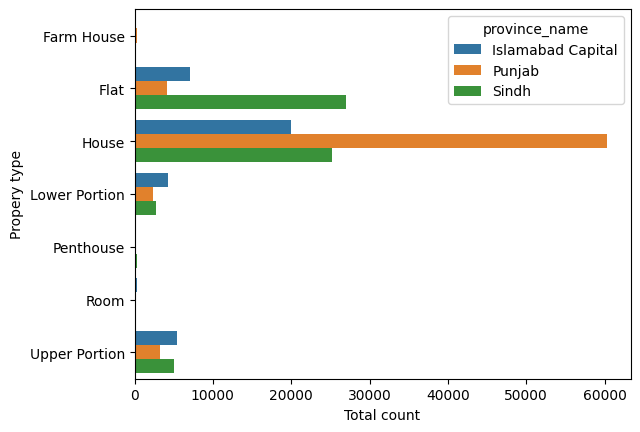

In [36]:
ax = sns.barplot(data=n_by_province,y='property_type',x='property_id',hue='province_name')
ax.set(xlabel='Total count', ylabel='Propery type')

In [38]:
by_type_price = house_df.groupby(['province_name','property_type'],as_index=False)['price'].mean()
by_type_price

,province_name,property_type,price
0,Islamabad Capital,Farm House,8.132691e+07
1,Islamabad Capital,Flat,5.318112e+06
2,Islamabad Capital,House,2.222364e+07
3,Islamabad Capital,Lower Portion,5.818778e+04
4,Islamabad Capital,Penthouse,1.622965e+07
5,Islamabad Capital,Room,1.893342e+05
6,Islamabad Capital,Upper Portion,8.448304e+04
7,Punjab,Farm House,4.992169e+07
8,Punjab,Flat,5.366691e+06
9,Punjab,House,2.074132e+07


<Axes: xlabel='price', ylabel='property_type'>

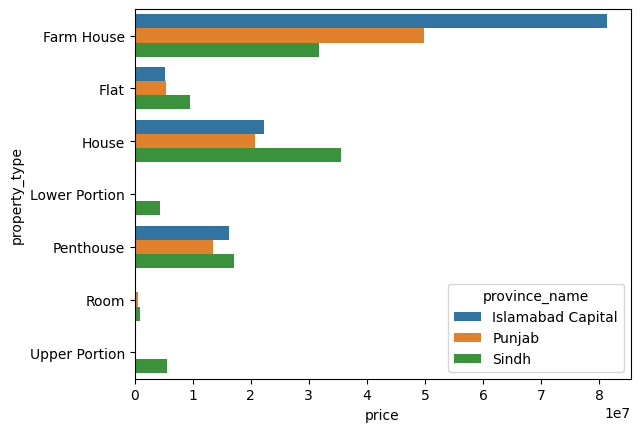

In [39]:
sns.barplot(data=by_type_price,y='property_type',x='price',hue='province_name')

In [40]:
area_size_price = house_df.groupby(['province_name','property_type','bedrooms'],as_index=False)['price'].mean()
area_size_price.sort_values('price',ascending=False)[:10]

,province_name,property_type,bedrooms,price
112,Punjab,House,25,960000000.0
111,Punjab,House,18,650000000.0
110,Punjab,House,16,350000000.0
11,Islamabad Capital,Farm House,11,202625000.0
8,Islamabad Capital,Farm House,8,180000000.0
109,Punjab,House,15,175000000.0
180,Sindh,House,14,165175000.0
32,Islamabad Capital,House,12,152600000.0
182,Sindh,House,16,150000000.0
35,Islamabad Capital,House,16,127500000.0


In [41]:
price_std_by_type = house_df.groupby(['province_name','property_type'],as_index=False)['price'].std()

price_std_by_type.sort_values('price',ascending=False)[:10]

,province_name,property_type,price
0,Islamabad Capital,Farm House,1.092349e+08
7,Punjab,Farm House,7.166395e+07
16,Sindh,House,5.375542e+07
2,Islamabad Capital,House,4.504241e+07
14,Sindh,Farm House,3.406927e+07
9,Punjab,House,3.314541e+07
4,Islamabad Capital,Penthouse,3.009056e+07
18,Sindh,Penthouse,2.757486e+07
11,Punjab,Penthouse,1.535293e+07
15,Sindh,Flat,1.209391e+07


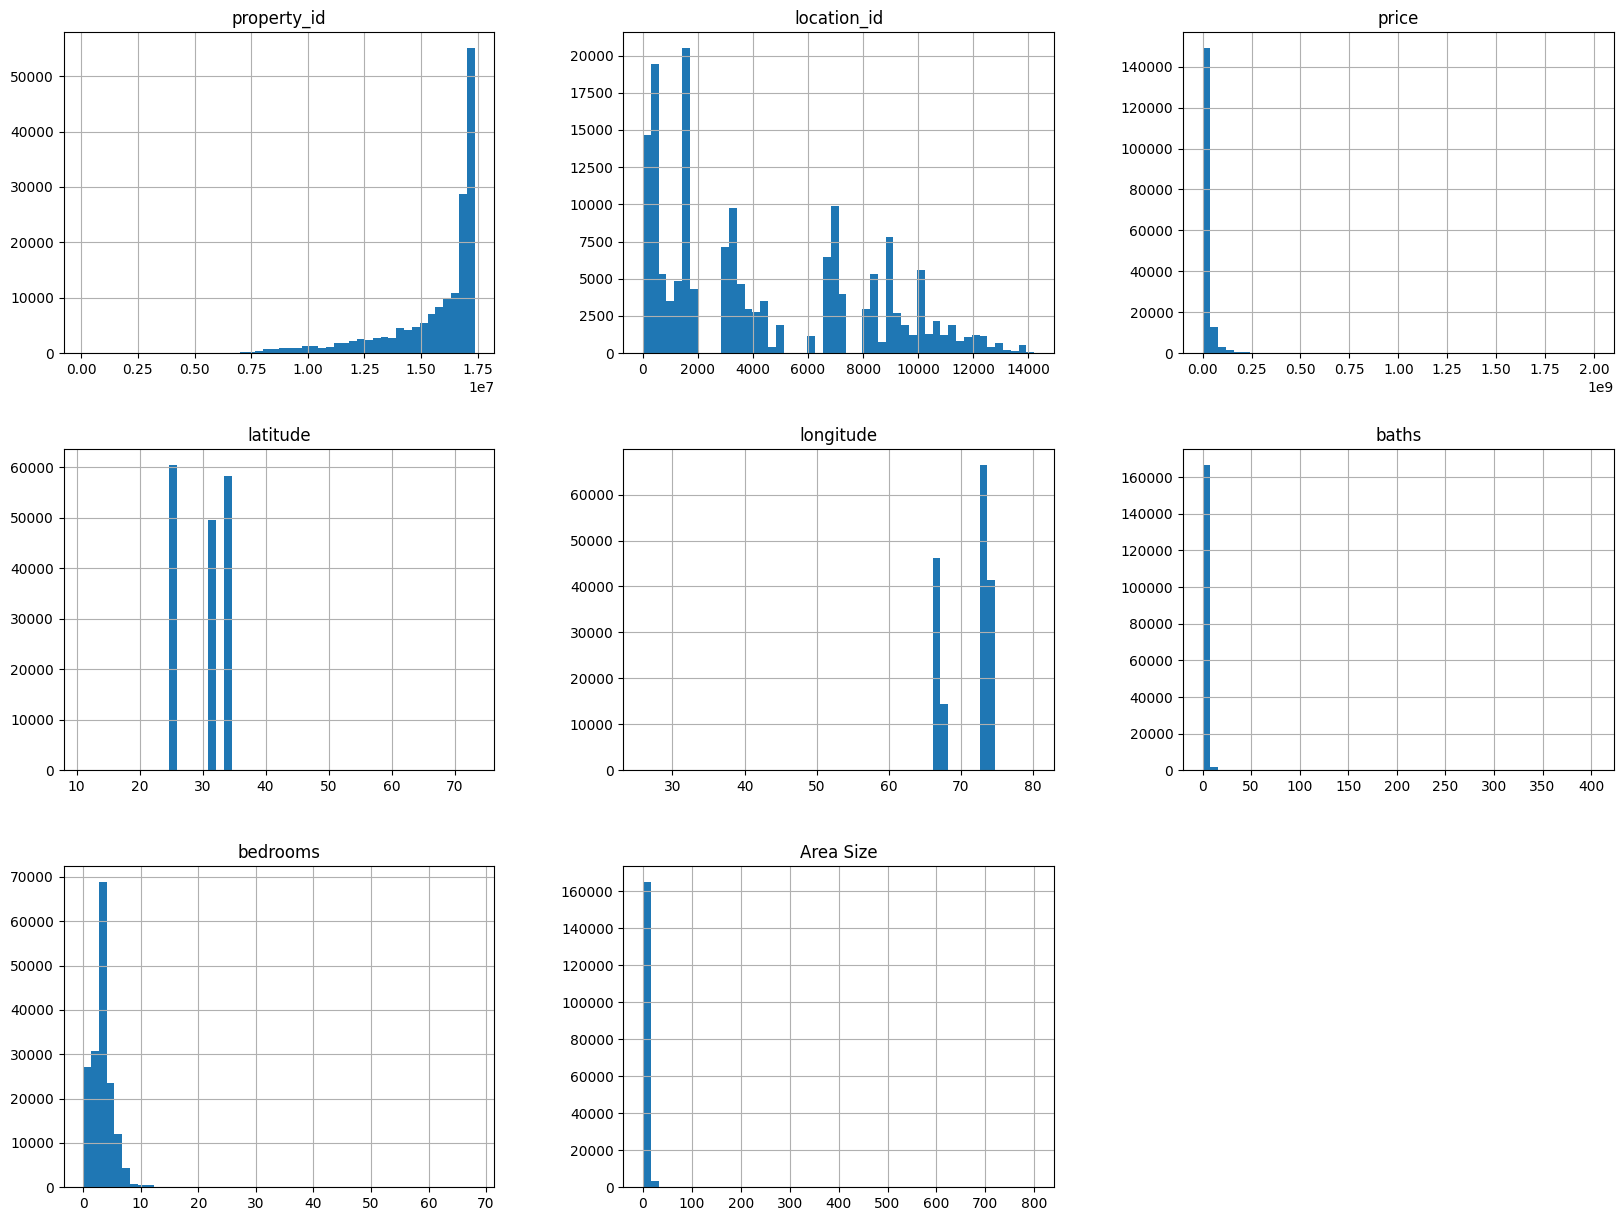

In [42]:
house_df.hist(bins=50, figsize=(20,15))
plt.show()

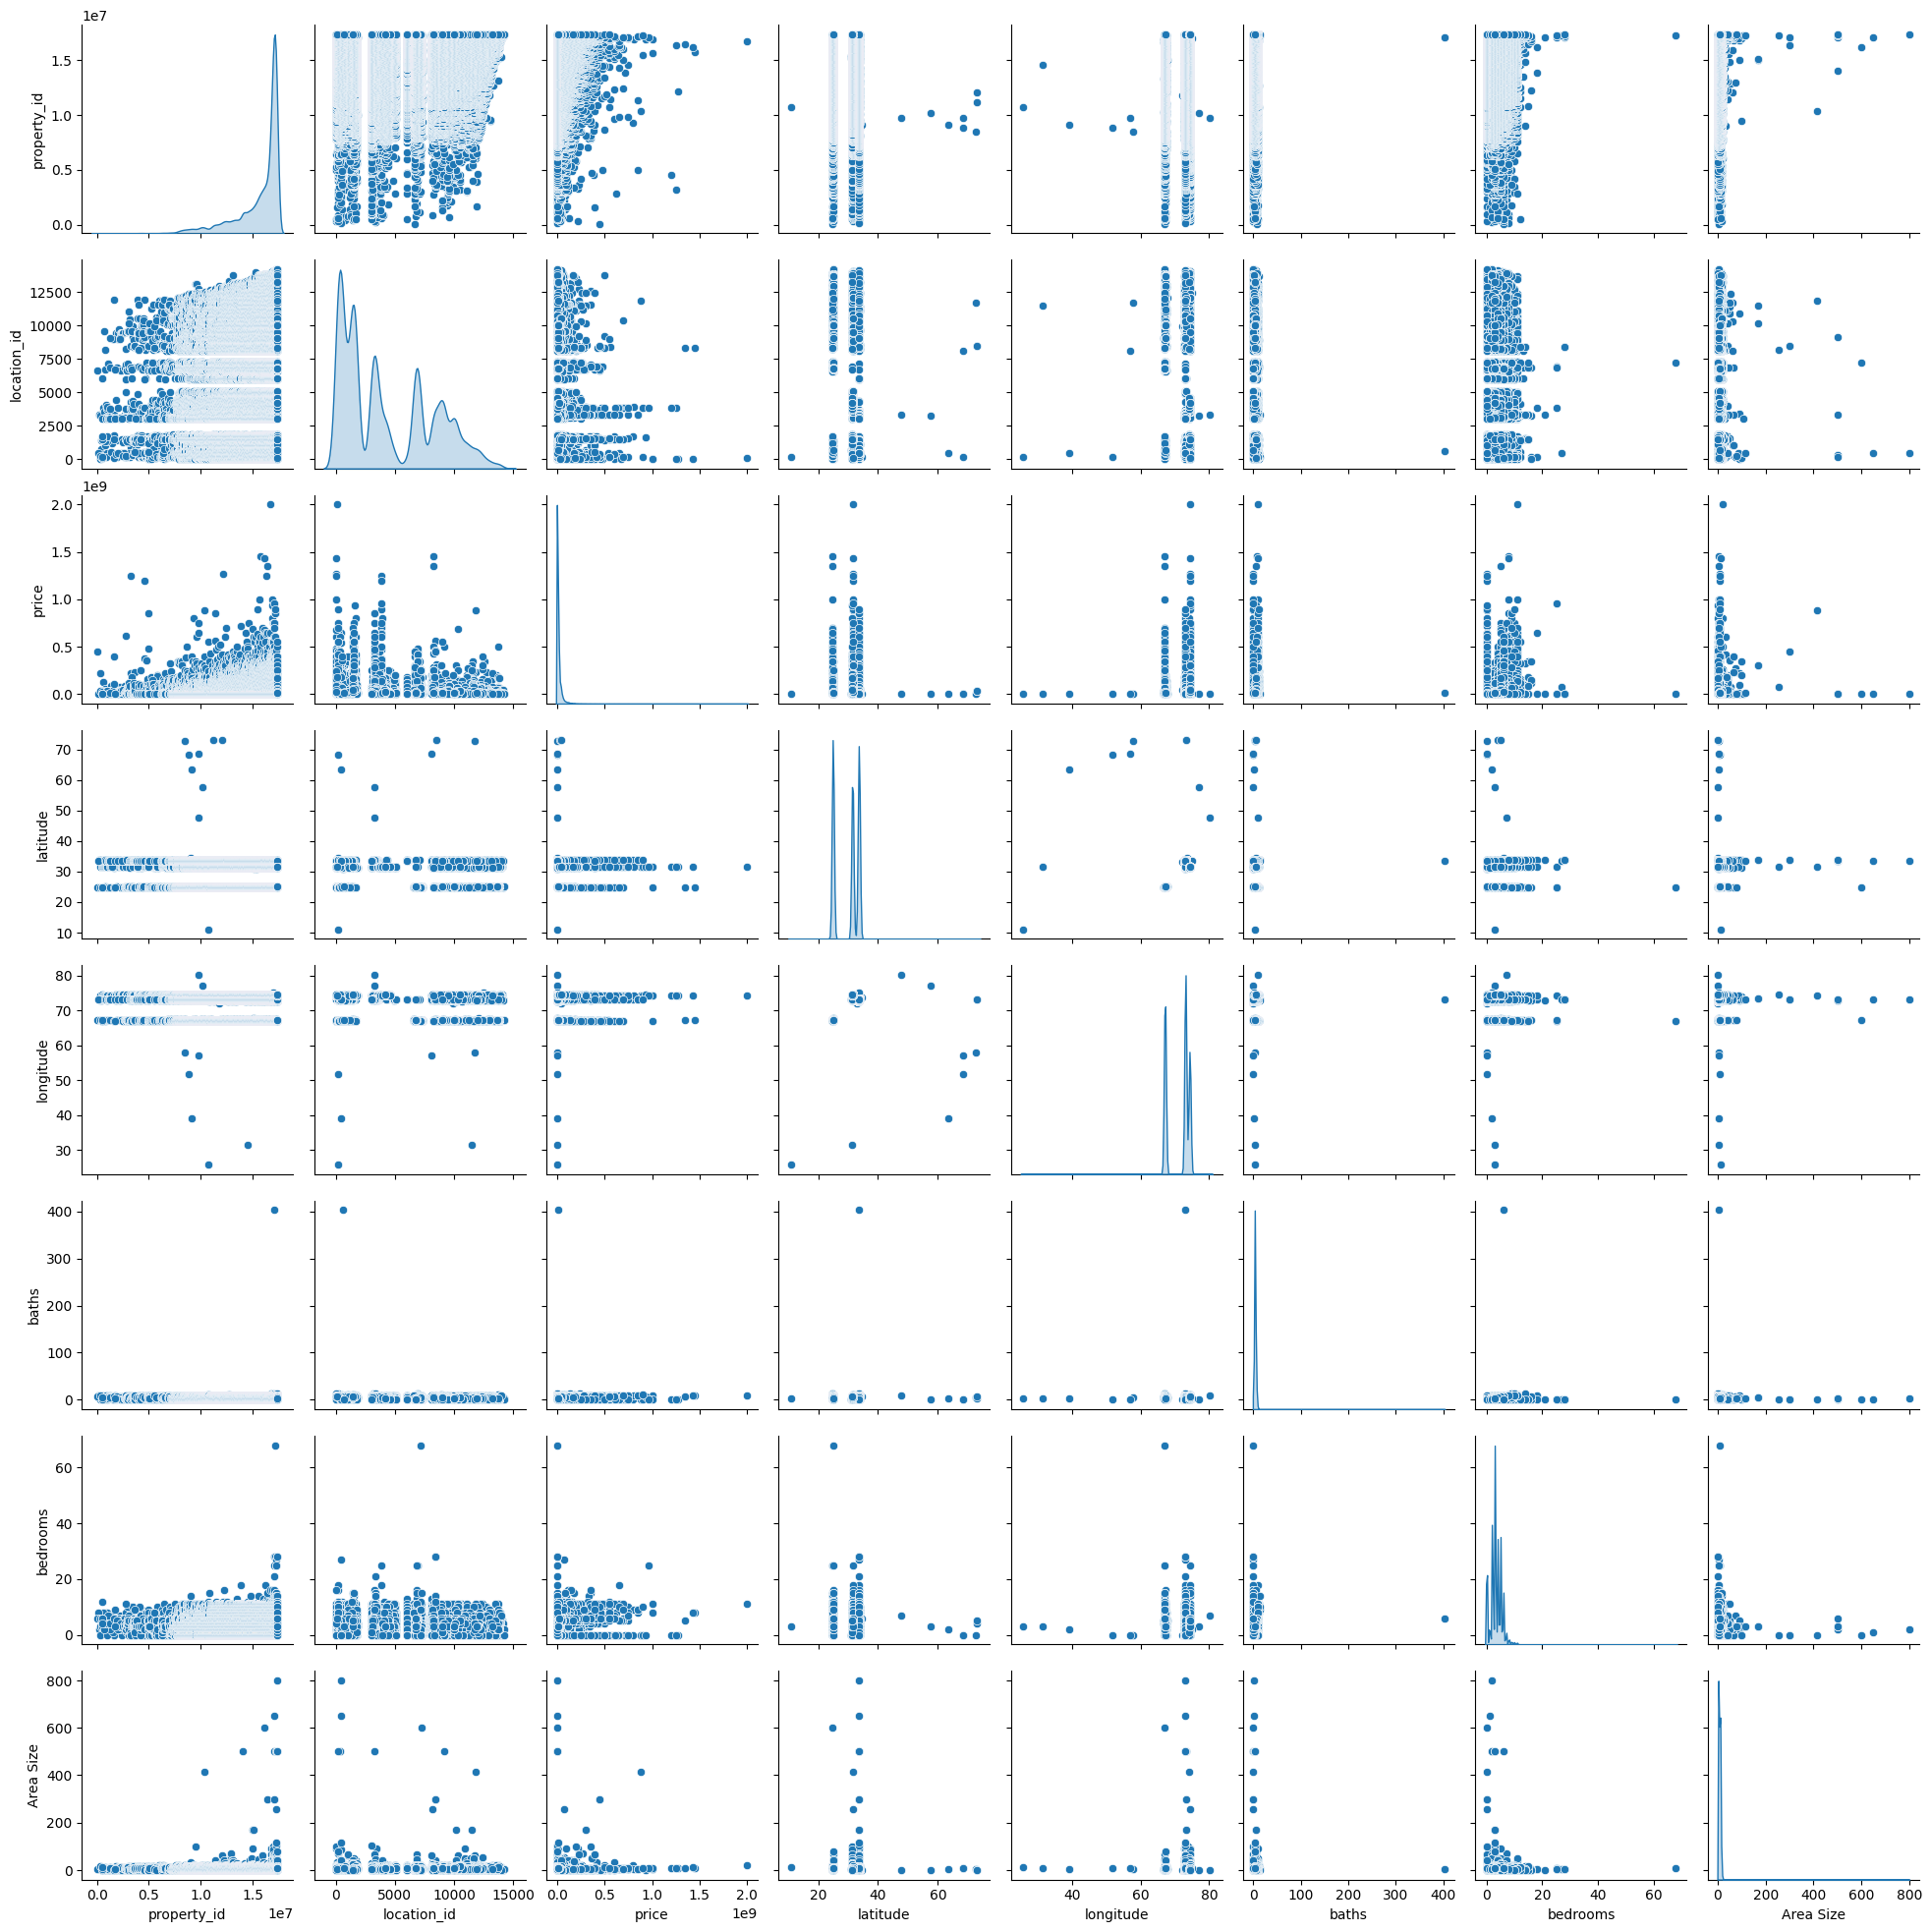

In [43]:
sns.pairplot(house_df, diag_kind = 'kde')

<ipython-input-45-5d88179f37d7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = house_df.corr().round(2)


Text(0.5, 1.0, 'Correlation Matrix untuk tiap fitur ')

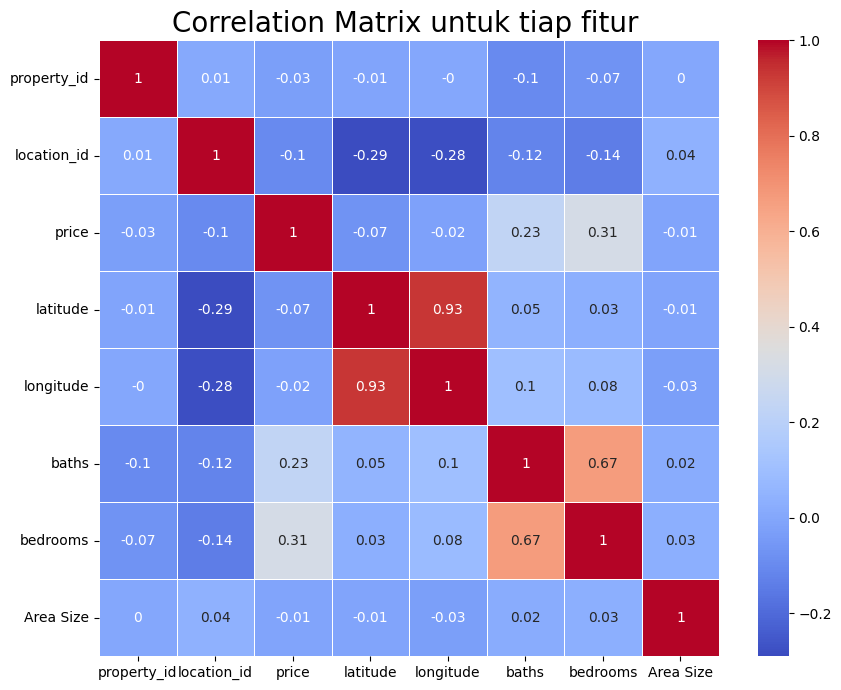

In [45]:
plt.figure(figsize=(10, 8))
correlation_matrix = house_df.corr().round(2)

# Parameter 'annot = True', untuk menampilkan nilai dalam persegi
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk tiap fitur ", size=20)